# OS Operations

Lets start our discussion with the OS library. This library is meant to provide standardized interactions over both UNIX based and windows based operating systems

In [ ]:
import os

The first thing you might want to do is get your current working directory. This is always known as ".'

In [ ]:
os.getcwd()

Next you want to get the contents of the directory. 

In [ ]:
os.listdir()

In [ ]:
# Printing the contents of the current directory
for item in os.listdir():
    print(item)

### What if I want to change directories?

In [ ]:
new_directory = "../flask"

# Change the current directory
os.chdir(new_directory)

print(os.getcwd())

In [ ]:
# Printing the contents of the current directory
for item in os.listdir():
    print(item)

In [ ]:
What about going complext places

In [ ]:
cwd = os.getcwd()
os.path.join(cwd,"scrap")


### Make a directory

In [ ]:
os.mkdir("./Storage")

In [ ]:
for item in os.listdir():
    print(item)

### Delete a directory

In [ ]:
os.rmdir("./Storage")

In [ ]:
for item in os.listdir():
    print(item)

### Why would we do this?

In [ ]:
dirname = "./Storage"
os.mkdir(dirname)
os.chdir(dirname)

In [ ]:

for i in range(0,10):
    with open(f"{i}.txt",'w') as f:
        f.write("I AM DUMPING DATA HERE")
        

    

In [ ]:
for item in os.listdir():
    os.remove(item)

os.listdir()



In [ ]:
os.chdir("..")
os.rmdir(dirname)

In [ ]:
os.getcwd()

In [ ]:
os.listdir()

In [ ]:
class STLDirManager():
    def __init__(self,dirname ="STL"):
        self.dirname = dirname
        self.cwd = os.getcwd()
        if self.dirname not in os.listdir():
            os.mkdir("./"+self.dirname)
        self.location  = os.path.join(self.cwd,self.dirname)
        
    def addSTL(self,STLData,name):
        os.chdir(self.location)
        print(os.getcwd())
        with open(f"{name}.STL",'w') as f:
            f.write(STLData)
            
    def getSTL(self,name):
        os.chdir(self.location)
        print(os.getcwd())
        with open(f"{name}.STL",'r') as f:
            return f.read()
    
    def __del__(self):
        os.chdir(self.location)
        print(os.getcwd())
        for item in os.listdir():
            os.remove(item)
        os.chdir(self.cwd)
        os.rmdir(self.dirname)

In [ ]:
stls = STLDirManager()

In [ ]:
stls.addSTL("SOME DATA","mystl")

In [ ]:
stls.getSTL("mystl")

In [ ]:
del stls

In [ ]:
os.getcwd()

### So we can encapsulate file systems into objects and then interace with them in our code! This is awesome
\
\
\
\
\
\
\
\


### WHat about running commands?

## Running System commands

In [ ]:
home_dir = os.system("cd ..")
print("`cd ..` ran with exit code %d" % home_dir)
print(os.getcwd())



The command runs and gives and exit code of "0" this mean it worked properly. but it does nothing

In [ ]:

unknown_dir = os.system("cd doesnotexist")
print("`cd doesnotexis` ran with exit code %d" % unknown_dir)

Because this doesnt exist We get the error code 1

## Launching a Program

Lets say we want to run a program from our flask work

In [ ]:
slicer_cmd = 'C:\\"Program Files"\\Prusa3D\\PrusaSlicer\\prusa-slicer-console.exe'
os.chdir('C://Users//j.lipton//OneDrive - Northeastern University//Github//IE5374//cmdline')

print(slicer_cmd)
print(os.getcwd())

os.system(slicer_cmd)

We are using the prusa slicer which has the same command line as Slic3r which can be seen here 

https://manual.slic3r.org/advanced/command-line

In [ ]:
for item in os.listdir():
    cmd  = slicer_cmd + f" -g {item} --layer-height 0.2"
    print(cmd)
    os.system(cmd)

In [ ]:
[item for item in os.listdir() if "gcode" in item]

In [ ]:
os.mkdir("./output")

In [ ]:

for item in os.listdir():
    if ".stl" in item.lower():
        outputname = item.lower().replace(".stl",".gcode")
        cmd  = slicer_cmd + f" -g {item} --layer-height 0.2 -o ./output/cmd-{outputname}"
        print(cmd)
        os.system(cmd)

In [ ]:
class STLManager():
    def __init__(self,dirname ="STL"):
        self.dirname = dirname
        self.cwd = os.getcwd()
        if self.dirname not in os.listdir():
            os.mkdir("./"+self.dirname)
        self.location  = os.path.join(self.cwd,self.dirname)
        
        self.slicer_cmd = 'C:\\"Program Files"\\Prusa3D\\PrusaSlicer\\prusa-slicer-console.exe'

        
    def addSTL(self,STLData,name):
        os.chdir(self.location)
        print(os.getcwd())
        with open(f"{name}.STL",'wb') as f:
            f.write(STLData)
            
    def getSTL(self,name):
        os.chdir(self.location)
        print(os.getcwd())
        with open(f"{name}.STL",'rb') as f:
            return f.read()
        
        
    def getGCode(self,name):
        os.chdir(self.location)
        gcodename = name+".gcode"
        stlname = name+".STL"
        if gcodename in os.listdir(): 
            with open(f"{gcodename}",'r') as f:
                return f.read()
            
        elif stlname in os.listdir():
            cmd  = self.slicer_cmd + f" -g {stlname} --layer-height 0.2"
            os.system(cmd)
            return self.getGCode(name)
        
            
    
    def __del__(self):
        os.chdir(self.location)
        print(os.getcwd())
        for item in os.listdir():
            os.remove(item)
        os.chdir(self.cwd)
        os.rmdir(self.dirname)

In [ ]:
os.chdir('C://Users//j.lipton//OneDrive - Northeastern University//Github//IE5374//cmdline')


In [ ]:
stls = STLManager()

In [ ]:
os.chdir('C://Users//j.lipton//OneDrive - Northeastern University//Github//IE5374//cmdline')
with open("Robot_Maker_Faire_65pc.STL",'rb') as f:
    contents = f.read()
    stls.addSTL(contents,"Robot1")

os.chdir('C://Users//j.lipton//OneDrive - Northeastern University//Github//IE5374//cmdline')
with open("Robot_Maker_Faire_150pc.stl",'rb') as f:
    contents = f.read()
    stls.addSTL(contents,"Robot2")


In [ ]:
codes = stls.getGCode('Robot1')
print(len(codes))

In [ ]:
codes = stls.getGCode('Robot1')
print(len(codes))

In [ ]:
codes = stls.getGCode('Robot2')
print(len(codes))

In [ ]:
del stls

### So we can run a slicer from command line and interace with it
\
\
\
\
\
\
### Lets launch our website

In [ ]:
os.chdir('C://Users//j.lipton//OneDrive - Northeastern University//Github//IE5374//Flask')
os.system("python todo.py")

### We can use this to launch a command but it blocks the entire program!!! How can we launch something and not have it block?
\
\
\
\
\
\
\
\
\
\
\
\
\
\



# SUB PROCESS

In [1]:
import subprocess

In [2]:
import os
os.getcwd()

'C:\\Users\\j.lipton\\OneDrive - Northeastern University\\Github\\IE5374\\JupyterNotebooks'

In [17]:
slicer_cmd = 'C:\\"Program Files"\\Prusa3D\\PrusaSlicer\\prusa-slicer-console.exe'

subprocess.run(slicer_cmd,shell=True)

CompletedProcess(args='C:\\"Program Files"\\Prusa3D\\PrusaSlicer\\prusa-slicer-console.exe', returncode=0)

In [18]:
cmd = "dir"
subprocess.run(cmd,shell = True)

CompletedProcess(args='dir', returncode=0)

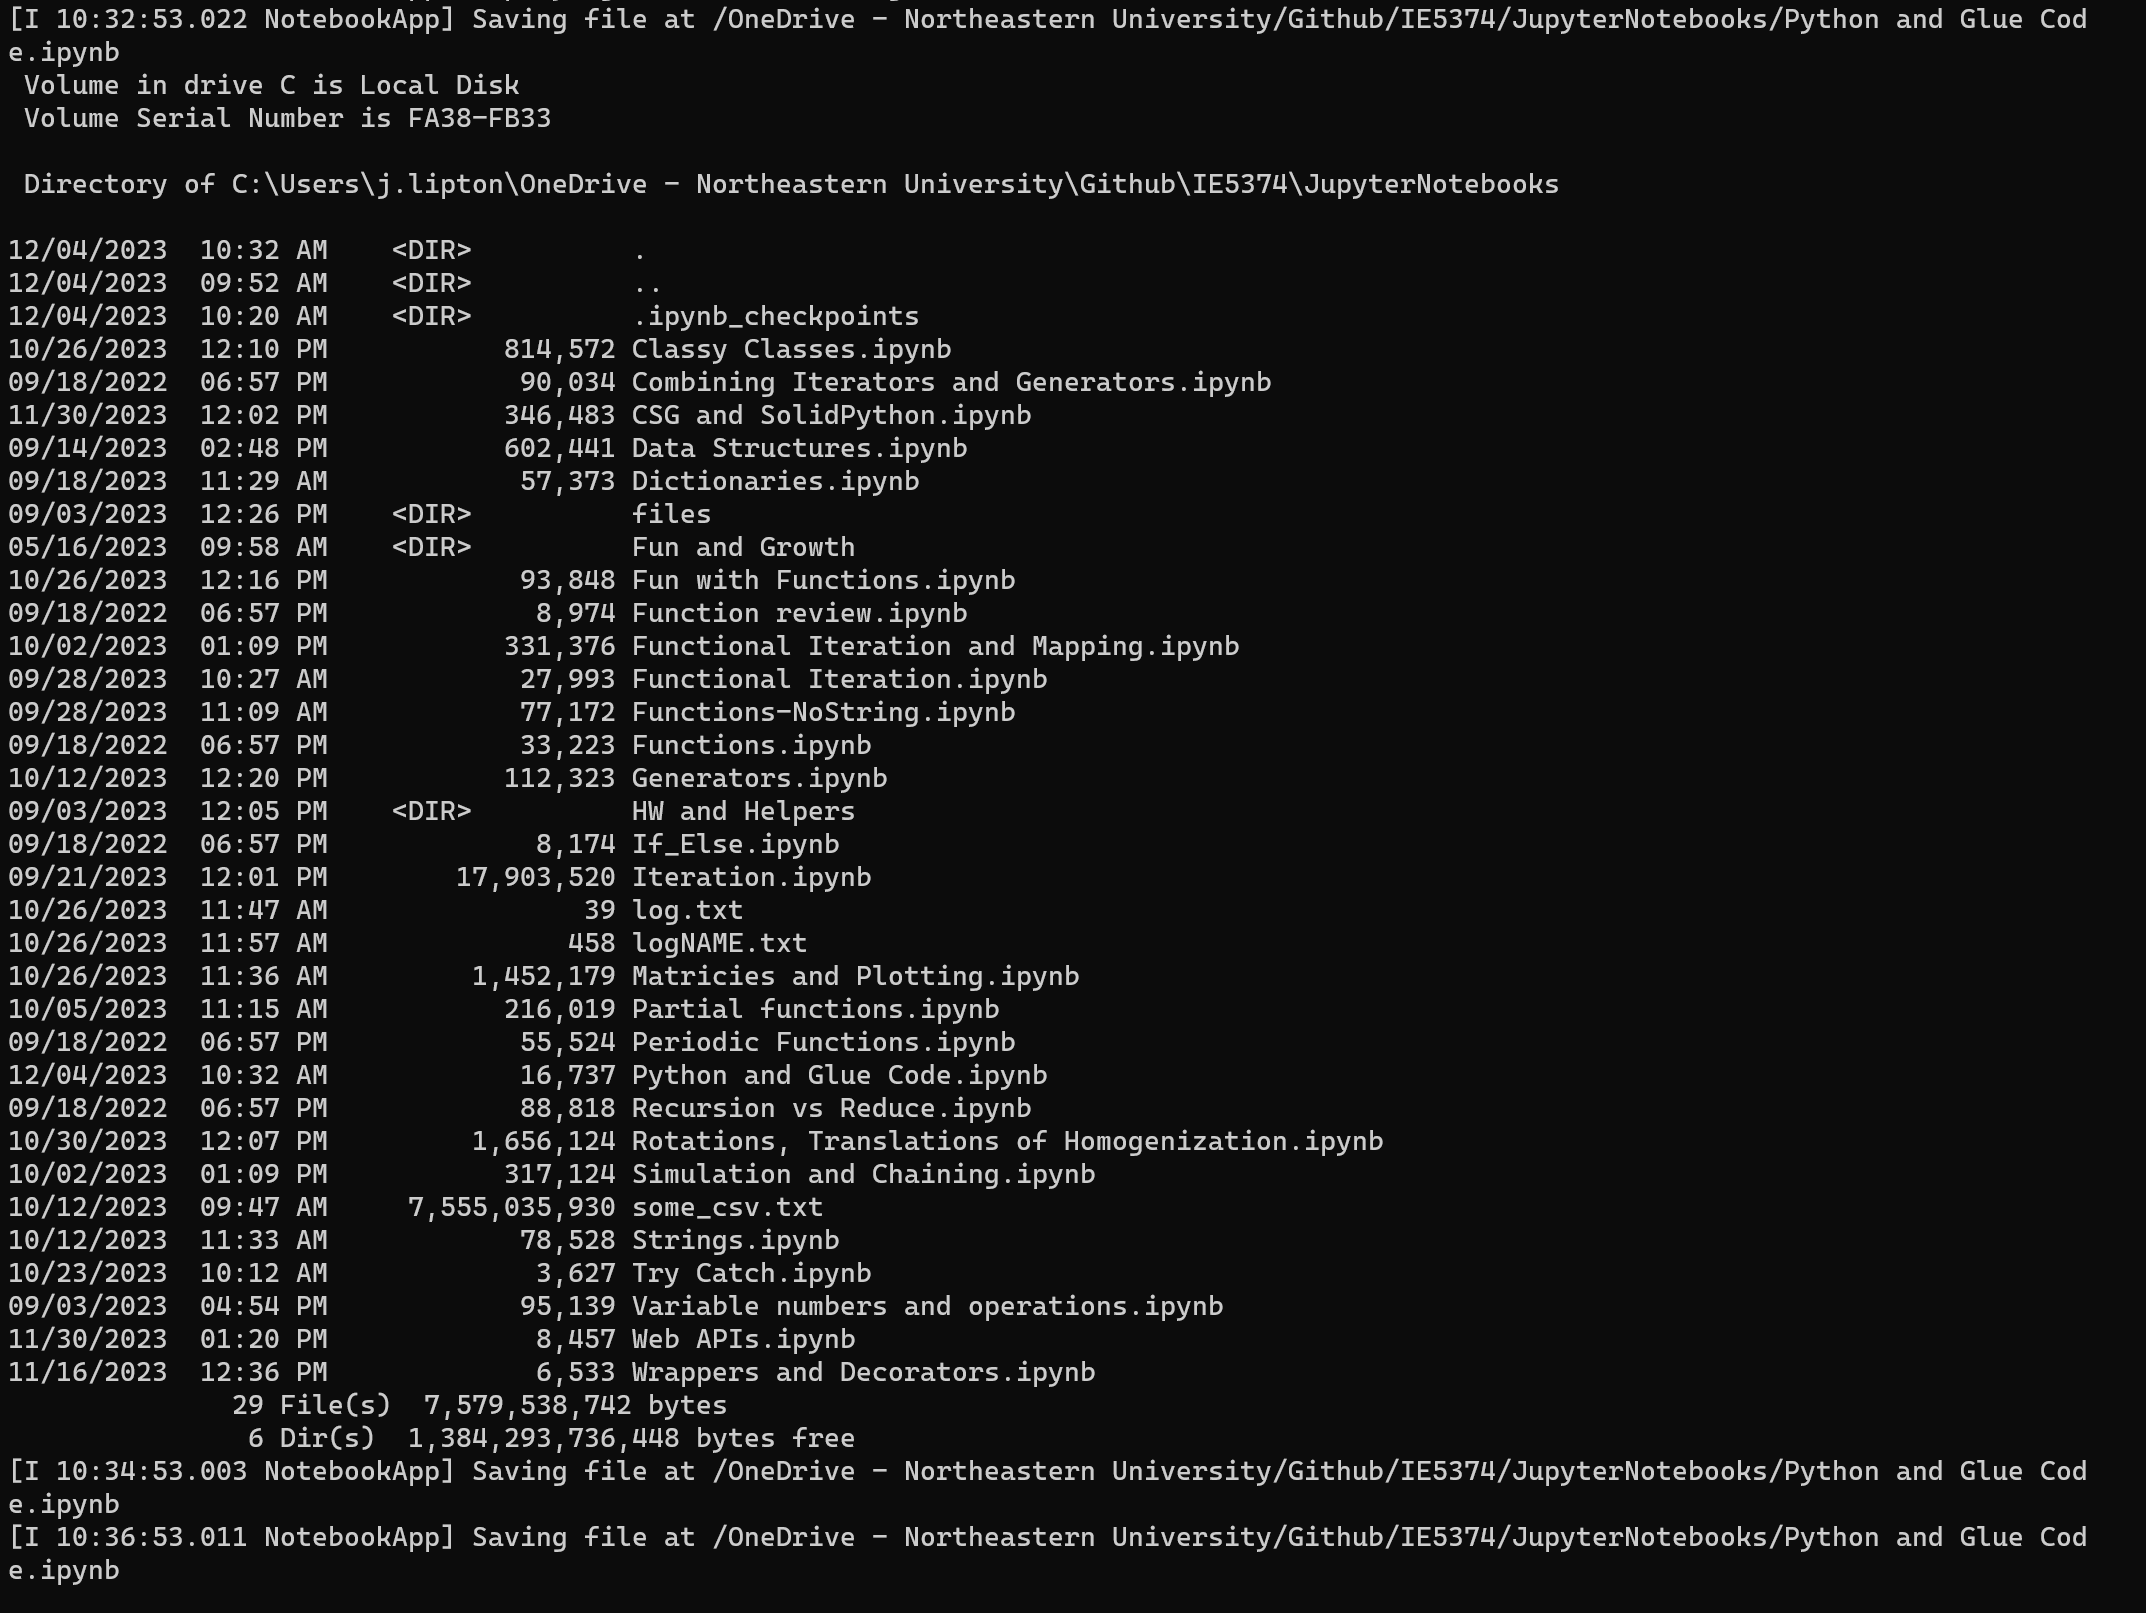

The Output is actually going to the jupyter terminal!

In [16]:
returned = subprocess.run(cmd,capture_output =True, shell=True)
print(returned.stdout.decode("utf-8"))

 Volume in drive C is Local Disk
 Volume Serial Number is FA38-FB33

 Directory of C:\Users\j.lipton\OneDrive - Northeastern University\Github\IE5374\JupyterNotebooks

12/04/2023  10:40 AM    <DIR>          .
12/04/2023  09:52 AM    <DIR>          ..
12/04/2023  10:20 AM    <DIR>          .ipynb_checkpoints
10/26/2023  12:10 PM           814,572 Classy Classes.ipynb
09/18/2022  06:57 PM            90,034 Combining Iterators and Generators.ipynb
11/30/2023  12:02 PM           346,483 CSG and SolidPython.ipynb
09/14/2023  02:48 PM           602,441 Data Structures.ipynb
09/18/2023  11:29 AM            57,373 Dictionaries.ipynb
09/03/2023  12:26 PM    <DIR>          files
05/16/2023  09:58 AM    <DIR>          Fun and Growth
10/26/2023  12:16 PM            93,848 Fun with Functions.ipynb
09/18/2022  06:57 PM             8,974 Function review.ipynb
10/02/2023  01:09 PM           331,376 Functional Iteration and Mapping.ipynb
09/28/2023  10:27 AM            27,993 Functional Iteration.ipynb

In [19]:
type(returned)

subprocess.CompletedProcess

In [20]:
help(subprocess.CompletedProcess)

Help on class CompletedProcess in module subprocess:

class CompletedProcess(builtins.object)
 |  CompletedProcess(args, returncode, stdout=None, stderr=None)
 |  
 |  A process that has finished running.
 |  
 |  This is returned by run().
 |  
 |  Attributes:
 |    args: The list or str args passed to run().
 |    returncode: The exit code of the process, negative for signals.
 |    stdout: The standard output (None if not captured).
 |    stderr: The standard error (None if not captured).
 |  
 |  Methods defined here:
 |  
 |  __init__(self, args, returncode, stdout=None, stderr=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  check_returncode(self)
 |      Raise CalledProcessError if the exit code is non-zero.
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  __class_getitem__ = GenericAlias(...) from builtins.type
 |      R

In [21]:
os.getcwd()

'C:\\Users\\j.lipton\\OneDrive - Northeastern University\\Github\\IE5374\\JupyterNotebooks'

In [24]:
os.chdir('C://Users//j.lipton//OneDrive - Northeastern University//Github//IE5374//cmdline')

In [25]:
for item in os.listdir():
    cmd  = slicer_cmd + f" -g {item} --layer-height 0.2"
    print(cmd)
    cp = subprocess.run(cmd,capture_output =True, shell=True)
    print(cp)

C:\"Program Files"\Prusa3D\PrusaSlicer\prusa-slicer-console.exe -g Robot_Maker_Faire_150pc.stl --layer-height 0.2
CompletedProcess(args='C:\\"Program Files"\\Prusa3D\\PrusaSlicer\\prusa-slicer-console.exe -g Robot_Maker_Faire_150pc.stl --layer-height 0.2', returncode=0, stdout=b'Slicing result exported to Robot_Maker_Faire_150pc.gcode\n10 => Processing triangulated mesh\r\n20 => Generating perimeters\r\n30 => Preparing infill\r\n45 => Making infill\r\n65 => Searching support spots\r\n69 => Alert if supports needed\r\nprint warning: Detected print stability issues:\r\n\r\nRobot_Maker_Faire_150pc.stl\r\nCollapsing overhang, Low bed adhesion, Loose extrusions\r\n\r\nConsider enabling supports.\r\nAlso consider enabling brim.\r\n89 => Calculating overhanging perimeters\r\n88 => Generating skirt and brim\r\n90 => Exporting G-code to Robot_Maker_Faire_150pc.gcode\r\n', stderr=b'')
C:\"Program Files"\Prusa3D\PrusaSlicer\prusa-slicer-console.exe -g Robot_Maker_Faire_65pc.stl --layer-height 0.2

In [28]:
print(cp.stdout.decode("utf-8"))

Slicing result exported to Robot_Maker_Faire_65pc.gcode
10 => Processing triangulated mesh
20 => Generating perimeters
30 => Preparing infill
45 => Making infill
65 => Searching support spots
69 => Alert if supports needed
print warning: Detected print stability issues:

Robot_Maker_Faire_65pc.stl
Collapsing overhang, Low bed adhesion, Loose extrusions

Consider enabling supports.
Also consider enabling brim.
89 => Calculating overhanging perimeters
88 => Generating skirt and brim
90 => Exporting G-code to Robot_Maker_Faire_65pc.gcode



### We can pipe the STDERR or STDOUT to a file for logging!

In [31]:
for item in os.listdir():
    if ".stl" in item.lower():
        cmd  = slicer_cmd + f" -g {item} --layer-height 0.2"
        print(cmd)
        with open(f"{item}.log",'w') as f:
            cp = subprocess.run(cmd,stdout=f,stderr=f, shell=True)
    

C:\"Program Files"\Prusa3D\PrusaSlicer\prusa-slicer-console.exe -g Robot_Maker_Faire_150pc.stl --layer-height 0.2
C:\"Program Files"\Prusa3D\PrusaSlicer\prusa-slicer-console.exe -g Robot_Maker_Faire_65pc.stl --layer-height 0.2


In [32]:
print(cp)

CompletedProcess(args='C:\\"Program Files"\\Prusa3D\\PrusaSlicer\\prusa-slicer-console.exe -g Robot_Maker_Faire_65pc.stl --layer-height 0.2', returncode=0)


But what if we dont want it to block

In [45]:
SUBP = subprocess.Popen(slicer_cmd,shell=True)

In [46]:
print("I CAN RUN WITHOUT WAITING")

I CAN RUN WITHOUT WAITING


In [47]:
print("But make sure you have the subprocess")
print(SUBP)

But make sure you have the subprocess
<Popen: returncode: None args: 'C:\\"Program Files"\\Prusa3D\\PrusaSlicer\\p...>


In [3]:
os.chdir('C://Users//j.lipton//OneDrive - Northeastern University//Github//IE5374//flask')

In [4]:
os.listdir()

['flasktest.py', 'scrap', 'Storage', 'test.py', 'todo.py']

In [ ]:
subp = subprocess.Popen("python ./todo.py")

In [18]:
import signal
subp.send_signal(signal.CTRL_C_EVENT)